# Import libraries

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [95]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [96]:
# For Notebooks
init_notebook_mode(connected=True)

In [97]:
# For offline use
cf.go_offline()

## Loading the data

Set index_col=0 to use the first column as the index.

In [98]:
df = pd.read_csv("diabetes.csv")

In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
df['result']=df.Outcome
df.drop('Outcome',axis=1,inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

In [103]:
scaler.fit(df.drop('result',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [104]:
scaled_features = scaler.transform(df.drop('result',axis=1))

In [105]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [106]:
#df.iplot(kind='scatter',mode='markers',size=10,labels=df.Outcome)
df[['result','DiabetesPedigreeFunction']].iplot(kind='scatter')

# Train Test Split

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['result'],
                                                    test_size=0.30)

# Using KNN model

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

### Choosing a K Value

In [111]:
error_rate = []

In [112]:
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

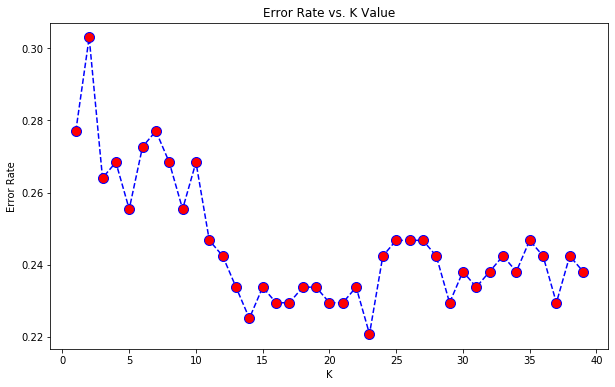

In [124]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [130]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[26,7,15,24,10,23,14]}
model = GridSearchCV(knn, parameters,iid='False', cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=15, p=2,
                                            weights='uniform'),
             iid='False', n_jobs=None,
             param_grid={'n_neighbors': [26, 7, 15, 24, 10, 23, 14]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [131]:
print ( model.best_params_ )

{'n_neighbors': 26}


In [132]:
nombre=model.best_params_['n_neighbors']

In [133]:
knn=KNeighborsClassifier(nombre)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
print('K Plus Proches Voisins avec C optimal (accuracy): '+str(accuracy_score(prediction,y_test)))

K Plus Proches Voisins avec C optimal (accuracy): 0.7532467532467533


### Prediction and Evaluation

Here we can see that that when K[26,27] the error rate just tends to hover around 0.21 Let's retrain the model with that and check the classification report!


In [134]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=26')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=26


[[135  21]
 [ 33  42]]


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       156
           1       0.67      0.56      0.61        75

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



# DECIDION Tree model

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dtree = DecisionTreeClassifier(criterion = "entropy",random_state=0)

In [137]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Prediction and Evaluation

In [138]:
predictions = dtree.predict(X_test)

In [139]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       156
           1       0.56      0.57      0.57        75

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.72      0.71      0.72       231



In [140]:
print(confusion_matrix(y_test,predictions))

[[122  34]
 [ 32  43]]


In [141]:
print('Decision Tree Classifier (Accuracy) : '+str(accuracy_score(predictions,y_test)))

Decision Tree Classifier (Accuracy) : 0.7142857142857143


In [142]:
###having a colored DT with pydot
from sklearn import tree
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image  

In [143]:
features = list(df_feat)
features


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

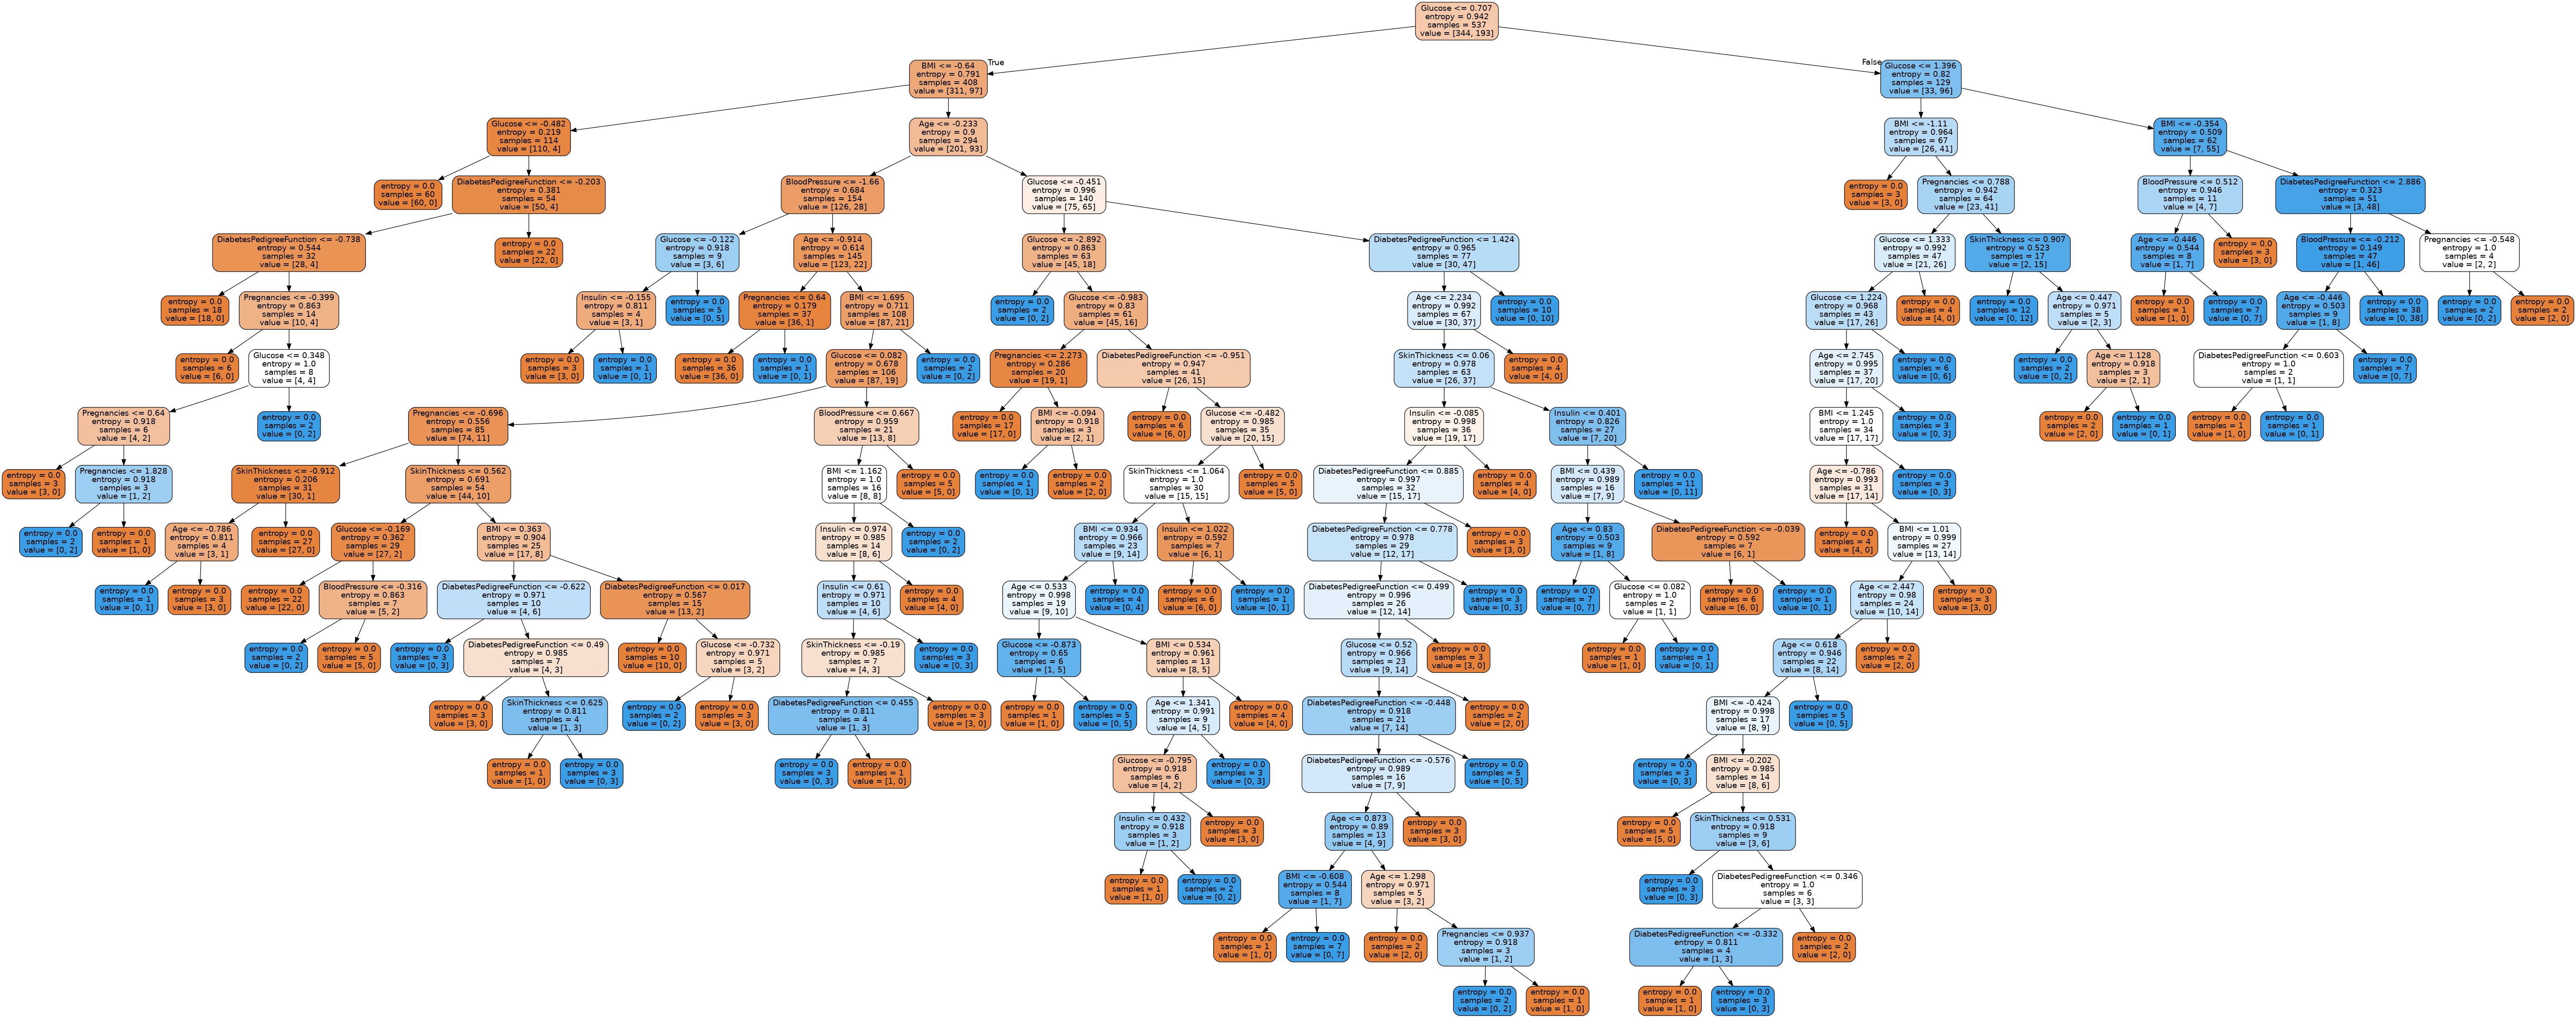

In [144]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [156]:
##pydotplus inorder to save the image
import pydotplus
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=df.drop('result', axis = 1).columns.values)
graph = pydotplus.graph_from_dot_data(dot_data) 

Image(graph.create_png())
graph.write_png("DiabetesdecisionTree.png")

True

# Training the Random Forest model

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rfc = RandomForestClassifier(n_estimators=600)

In [159]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [160]:
rpc_predictions = rfc.predict(X_test)

In [161]:
print(confusion_matrix(y_test,rpc_predictions))
print()
print(classification_report(y_test,rpc_predictions))

[[131  25]
 [ 25  50]]

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       156
           1       0.67      0.67      0.67        75

    accuracy                           0.78       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



# Comparaison de performances de classifieurs

In [162]:
#classifiers list
classifiers = [
('KNeighbors Classifier',KNeighborsClassifier(15)),
              ('Decision Tree Classifier',DecisionTreeClassifier(criterion = "entropy",random_state=0)),(
'Random Forest Classifier',RandomForestClassifier(n_estimators=200))]

In [163]:
# Definition des métriques de performance
def perf_compute(clf, name):
    """
    Calcule le temps d'apprentissage, de prediction, le score
    et la matrice de confusion d'un classifieur
    """
    # On initialise le conteneur
    perf = pd.Series(name=name)
    # On crée les callables qu'on passera à la fonction de profiling
    fit = lambda: clf.fit(X_train, y_train)
    score = lambda: clf.score(X_test, y_test)

    
    # On calcule le score en pourcentage
    perf['score'] = fit().score(X_test, y_test) * 100
    # On calcule la matrice de confusion
    perf['conf_mat'] = [confusion_matrix(fit().predict(X_test), y_test)]
    
    return perf

In [164]:
#  performance calculation
perfs = pd.DataFrame([perf_compute(clf, name) for name, clf in classifiers])
perfs = perfs.sort_values('score')

perfs['score'.split()].T

,Decision Tree Classifier,KNeighbors Classifier,Random Forest Classifier
score,71.428571,76.623377,77.922078


In [165]:
def plot_conf_mat(perf, ax, title='Model'):
    """
     Confusion Matrix
    """
    sns.heatmap(perf.conf_mat[0], ax=ax, square=True, annot=True)
    ax.set_title('{}: {}\nScore: {:.2f}'.format(title, perf.name, perf.score))
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')

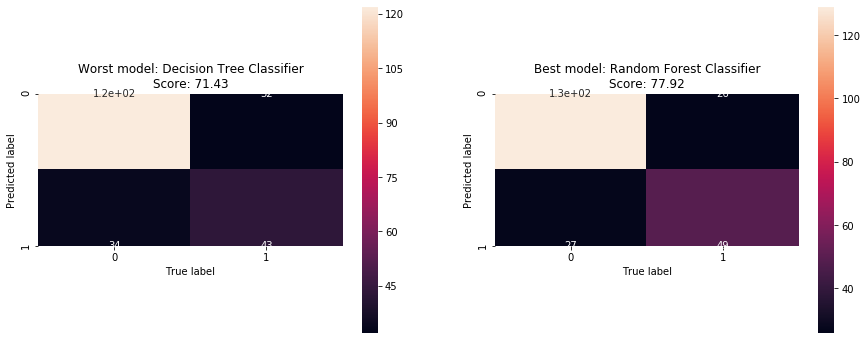

In [166]:
# Show the best and the worst classifier 
#classified by increasing scores
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
plot_conf_mat(perfs.iloc[0], ax=axs[0], title='Worst model')
plot_conf_mat(perfs.iloc[-1], ax=axs[1], title='Best model')